**Data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Data Visualization

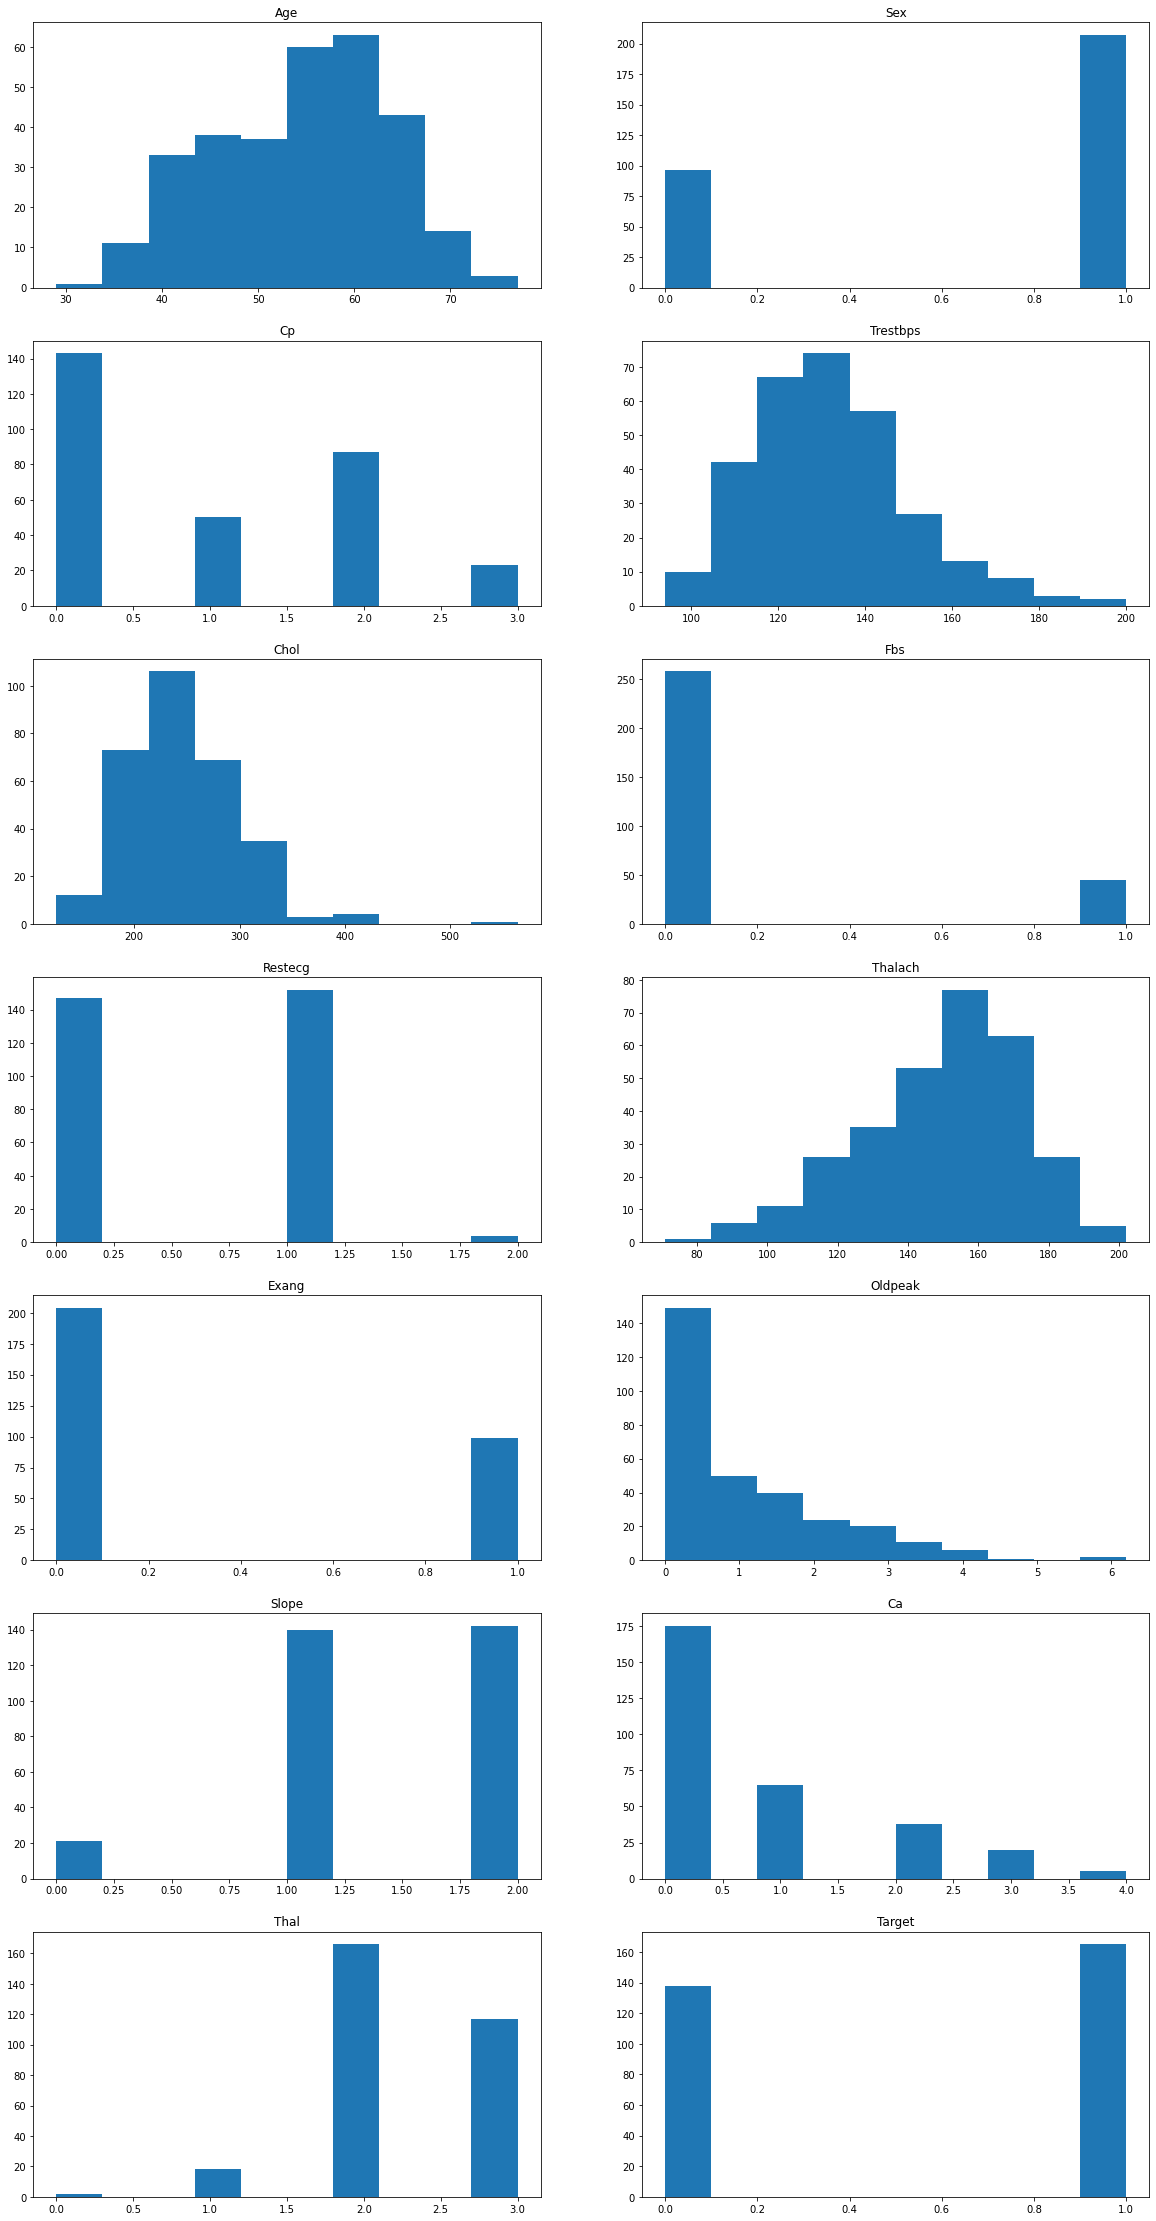

In [7]:
fig,ax = plt.subplots(nrows=7,
                      ncols=2,
                      figsize=(20,40))

for i in range(7):
    for j in range(2):
        ax[i,j].hist(df[df.columns.values.reshape(7,2)[i,j]])
        ax[i,j].set(title=df.columns.values.reshape(7,2)[i,j].capitalize())
plt.show()

## Data Modelling

In [13]:
# Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier, plot_tree, plot_importance

In [14]:
## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Getting Data ready

In [20]:
X = df.iloc[:,:-1]
y = df.target
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [40]:
def eval_metrics(predictor):
    y_pred = predictor.predict(X_test)
    print("Accuracy:",predictor.score(X_test,y_test))
    print("Cross-val score:",cross_val_score(predictor,X_test,y_test))
    print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [156]:
# Logistic Regression
import warnings
warnings.filterwarnings('ignore')
lg_reg = LogisticRegression()
lg_reg.fit(X_train,y_train)
eval_metrics(lg_reg)
warnings.filterwarnings('default')

Accuracy: 0.7540983606557377
Cross-val score: [0.61538462 0.83333333 0.33333333 0.83333333 0.83333333]
Confusion Matrix:
 [[24 13]
 [ 2 22]]
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        37
           1       0.63      0.92      0.75        24

    accuracy                           0.75        61
   macro avg       0.78      0.78      0.75        61
weighted avg       0.81      0.75      0.76        61



In [43]:
# SGD Classifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train,y_train)
eval_metrics(sgd_clf)

Accuracy: 0.45901639344262296
Cross-val score: [0.38461538 0.41666667 0.58333333 0.58333333 0.66666667]
Confusion Matrix:
 [[ 5 32]
 [ 1 23]]
              precision    recall  f1-score   support

           0       0.83      0.14      0.23        37
           1       0.42      0.96      0.58        24

    accuracy                           0.46        61
   macro avg       0.63      0.55      0.41        61
weighted avg       0.67      0.46      0.37        61



In [253]:
# KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
eval_metrics(knn)

Accuracy: 0.6065573770491803
Cross-val score: [0.46153846 0.66666667 0.41666667 0.66666667 0.58333333]
Confusion Matrix:
 [[20 17]
 [ 7 17]]
              precision    recall  f1-score   support

           0       0.74      0.54      0.62        37
           1       0.50      0.71      0.59        24

    accuracy                           0.61        61
   macro avg       0.62      0.62      0.61        61
weighted avg       0.65      0.61      0.61        61



In [56]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train,y_train)
eval_metrics(svc)

Accuracy: 0.6065573770491803
Cross-val score: [0.61538462 0.58333333 0.58333333 0.58333333 0.66666667]
Confusion Matrix:
 [[16 21]
 [ 3 21]]
              precision    recall  f1-score   support

           0       0.84      0.43      0.57        37
           1       0.50      0.88      0.64        24

    accuracy                           0.61        61
   macro avg       0.67      0.65      0.60        61
weighted avg       0.71      0.61      0.60        61



In [57]:
# AdaBoost
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train,y_train)
eval_metrics(ada_boost)

Accuracy: 0.7540983606557377
Cross-val score: [0.53846154 0.75       0.5        0.58333333 0.75      ]
Confusion Matrix:
 [[27 10]
 [ 5 19]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        37
           1       0.66      0.79      0.72        24

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.77      0.75      0.76        61



In [58]:
# Gradient Boosting
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
eval_metrics(gb_clf)

Accuracy: 0.6885245901639344
Cross-val score: [0.76923077 0.66666667 0.33333333 0.66666667 0.91666667]
Confusion Matrix:
 [[24 13]
 [ 6 18]]
              precision    recall  f1-score   support

           0       0.80      0.65      0.72        37
           1       0.58      0.75      0.65        24

    accuracy                           0.69        61
   macro avg       0.69      0.70      0.69        61
weighted avg       0.71      0.69      0.69        61



In [59]:
# RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
eval_metrics(rf_clf)

Accuracy: 0.7377049180327869
Cross-val score: [0.61538462 0.75       0.75       0.83333333 0.91666667]
Confusion Matrix:
 [[25 12]
 [ 4 20]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        37
           1       0.62      0.83      0.71        24

    accuracy                           0.74        61
   macro avg       0.74      0.75      0.74        61
weighted avg       0.77      0.74      0.74        61



In [60]:
# XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
eval_metrics(xgb)

Accuracy: 0.7049180327868853
Cross-val score: [0.46153846 0.66666667 0.58333333 0.83333333 0.75      ]
Confusion Matrix:
 [[23 14]
 [ 4 20]]
              precision    recall  f1-score   support

           0       0.85      0.62      0.72        37
           1       0.59      0.83      0.69        24

    accuracy                           0.70        61
   macro avg       0.72      0.73      0.70        61
weighted avg       0.75      0.70      0.71        61



In [110]:
def eval_metrics_pd(predictors):
    metrics_dict = {'Name':[],'Accuracy':[],'Cross-val score Mean':[],'Cross-val score':[],'Confusion Matrix':[],'Classification report':[],'Model':[]}
    
    for predictor in predictors:
        clf = predictor
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        metrics_dict['Name'].append(str(predictor))
        metrics_dict['Model'].append(clf)
        metrics_dict['Accuracy'].append(clf.score(X_test,y_test))
        metrics_dict['Cross-val score'].append(cross_val_score(clf,X_test,y_test))
        metrics_dict['Cross-val score Mean'].append(np.mean(cross_val_score(clf,X_test,y_test)))
        metrics_dict['Confusion Matrix'].append(confusion_matrix(y_test, y_pred))
        metrics_dict['Classification report'].append(classification_report(y_test, y_pred))
        
    return pd.DataFrame(metrics_dict)

In [138]:
import warnings
warnings.filterwarnings('ignore')
metrics = eval_metrics_pd([LogisticRegression(),SGDClassifier(),KNeighborsClassifier(),SVC(),AdaBoostClassifier(), GradientBoostingClassifier(),RandomForestClassifier()])
warnings.filterwarnings('default')
metrics

,Name,Accuracy,Cross-val score Mean,Cross-val score,Confusion Matrix,Classification report,Model
0,LogisticRegression(),0.754098,0.689744,"[0.6153846153846154, 0.8333333333333334, 0.333...","[[24, 13], [2, 22]]",precision recall f1-score ...,LogisticRegression()
1,SGDClassifier(),0.590164,0.606410,"[0.5384615384615384, 0.5833333333333334, 0.583...","[[34, 3], [22, 2]]",precision recall f1-score ...,SGDClassifier()
2,KNeighborsClassifier(),0.606557,0.558974,"[0.46153846153846156, 0.6666666666666666, 0.41...","[[20, 17], [7, 17]]",precision recall f1-score ...,KNeighborsClassifier()
3,SVC(),0.606557,0.606410,"[0.6153846153846154, 0.5833333333333334, 0.583...","[[16, 21], [3, 21]]",precision recall f1-score ...,SVC()
4,AdaBoostClassifier(),0.754098,0.624359,"[0.5384615384615384, 0.75, 0.5, 0.583333333333...","[[27, 10], [5, 19]]",precision recall f1-score ...,"(DecisionTreeClassifier(max_depth=1, random_st..."
5,GradientBoostingClassifier(),0.688525,0.670513,"[0.6153846153846154, 0.6666666666666666, 0.333...","[[24, 13], [6, 18]]",precision recall f1-score ...,([DecisionTreeRegressor(criterion='friedman_ms...
6,RandomForestClassifier(),0.737705,0.771795,"[0.6923076923076923, 0.8333333333333334, 0.75,...","[[26, 11], [5, 19]]",precision recall f1-score ...,"(DecisionTreeClassifier(max_features='auto', r..."


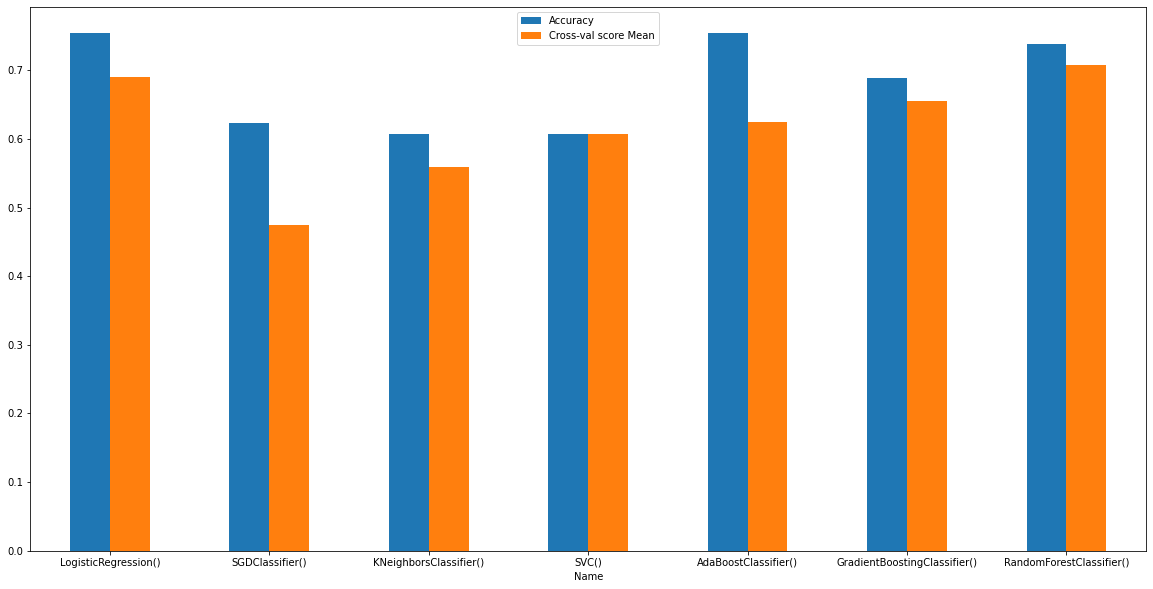

In [137]:
metrics[['Name','Accuracy','Cross-val score Mean']].plot.bar(x='Name',figsize=(20,10))
plt.xticks(rotation=0)
plt.show()

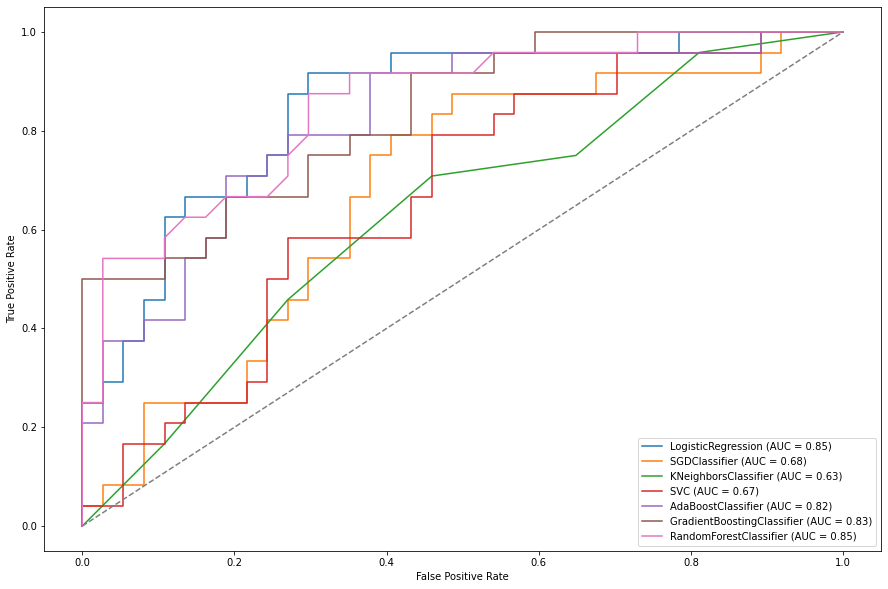

In [152]:
fig ,ax = plt.subplots(figsize=(15,10))
for clf in metrics['Model']:
    plot_roc_curve(clf,X_test,y_test,ax=ax)
ax.plot([0,1],[0,1], linestyle='--')


## Hyperparameter Tuning

In [198]:
# LogisticRegression
params = {"solver" :['newton-cg', 'lbfgs', 'liblinear'],
          "penalty" : ['l2'],
          "C" : np.logspace(-4, 4, 20)}
randcv_lg_reg = RandomizedSearchCV(LogisticRegression(max_iter=1000),param_distributions=params,n_iter=50,n_jobs=-1,scoring='f1',cv=5,verbose=True)
randcv_lg_reg.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    4.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='f1', verbose=True)

In [217]:
print(classification_report(y_test,randcv_lg_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74        37
           1       0.61      0.92      0.73        24

    accuracy                           0.74        61
   macro avg       0.77      0.77      0.74        61
weighted avg       0.80      0.74      0.74        61



In [200]:
confusion_matrix(y_test,randcv_lg_reg.predict(X_test))

array([[23, 14],
       [ 2, 22]], dtype=int64)

In [201]:
randcv_lg_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 1.623776739188721}

In [208]:
params = {"solver" :['lbfgs', 'liblinear'],
          "penalty" : ['l2'],
          "C" : np.arange(0,2,0.2)}
gridcv_lg_reg = GridSearchCV(LogisticRegression(max_iter=1000),param_grid=params,n_jobs=-1,scoring='f1',cv=5,verbose=True)
gridcv_lg_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    2.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
                         'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']},
             scoring='f1', verbose=True)

In [215]:
gridcv_lg_reg.best_estimator_

LogisticRegression(C=1.2000000000000002, max_iter=1000, solver='liblinear')

In [222]:
print(classification_report(y_test,gridcv_lg_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76        37
           1       0.63      0.92      0.75        24

    accuracy                           0.75        61
   macro avg       0.78      0.78      0.75        61
weighted avg       0.81      0.75      0.76        61



In [212]:
confusion_matrix(y_test,gridcv_lg_reg.predict(X_test))

array([[24, 13],
       [ 2, 22]], dtype=int64)

In [226]:
# AdaBoostClassifier
AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [227]:
params = {"n_estimators" : [50,100,200,250]}
gridcv_ada_clf = GridSearchCV(AdaBoostClassifier(),param_grid=params,n_jobs=-1,scoring='f1',cv=5,verbose=True)
gridcv_ada_clf.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   11.4s finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [50, 100, 200, 250]}, scoring='f1',
             verbose=True)

In [228]:
print(classification_report(y_test,gridcv_ada_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        37
           1       0.62      0.75      0.68        24

    accuracy                           0.72        61
   macro avg       0.72      0.73      0.72        61
weighted avg       0.74      0.72      0.72        61



In [229]:
confusion_matrix(y_test,gridcv_ada_clf.predict(X_test))

array([[26, 11],
       [ 6, 18]], dtype=int64)

In [224]:
# GradientBoostingClassifier
GradientBoostingClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [230]:
params = {"n_estimators" : [50,100,200,250]}
gridcv_gb_clf = GridSearchCV(GradientBoostingClassifier(),param_grid=params,n_jobs=-1,scoring='f1',cv=5,verbose=True)
gridcv_gb_clf.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [50, 100, 200, 250]}, scoring='f1',
             verbose=True)

In [231]:
print(classification_report(y_test,gridcv_gb_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        37
           1       0.61      0.79      0.69        24

    accuracy                           0.72        61
   macro avg       0.72      0.73      0.72        61
weighted avg       0.75      0.72      0.72        61



In [232]:
confusion_matrix(y_test,gridcv_gb_clf.predict(X_test))

array([[25, 12],
       [ 5, 19]], dtype=int64)

In [225]:
# RandomForestClassifier
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [237]:
params = {"n_estimators" : [50,100,200,250],
         "max_features":['auto', 'sqrt'],
         "min_samples_split":[2,5,10,15,20]}
gridcv_rf_clf = GridSearchCV(RandomForestClassifier(),param_grid=params,n_jobs=-1,scoring='f1',cv=5,verbose=True)
gridcv_rf_clf.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   14.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [50, 100, 200, 250]},
             scoring='f1', verbose=True)

In [238]:
print(classification_report(y_test,gridcv_rf_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77        37
           1       0.64      0.88      0.74        24

    accuracy                           0.75        61
   macro avg       0.76      0.78      0.75        61
weighted avg       0.79      0.75      0.76        61



In [239]:
confusion_matrix(y_test,gridcv_rf_clf.predict(X_test))

array([[25, 12],
       [ 3, 21]], dtype=int64)

In [240]:
gridcv_rf_clf.best_params_

{'max_features': 'auto', 'min_samples_split': 20, 'n_estimators': 100}

# Final Choice
LogisticRegression or RandomForestClassifier

In [261]:
warnings.filterwarnings('ignore')
hyper_metrics = eval_metrics_pd([lg_reg, rf_clf, gridcv_lg_reg, gridcv_rf_clf])
warnings.filterwarnings('default')
hyper_metrics

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    1.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    1.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    1.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    1.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   15.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   14.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   14.7s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   14.1s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   13.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   14.5s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   15.1s finished


,Name,Accuracy,Cross-val score Mean,Cross-val score,Confusion Matrix,Classification report,Model
0,LogisticRegression(),0.754098,0.689744,"[0.6153846153846154, 0.8333333333333334, 0.333...","[[24, 13], [2, 22]]",precision recall f1-score ...,LogisticRegression()
1,RandomForestClassifier(),0.721311,0.739744,"[0.6923076923076923, 0.75, 0.8333333333333334,...","[[25, 12], [5, 19]]",precision recall f1-score ...,"(DecisionTreeClassifier(max_features='auto', r..."
2,"GridSearchCV(cv=5, estimator=LogisticRegressio...",0.745763,0.554029,"[0.6153846153846154, 0.8333333333333333, 0.0, ...","[[24, 13], [2, 22]]",precision recall f1-score ...,"GridSearchCV(cv=5, estimator=LogisticRegressio..."
3,"GridSearchCV(cv=5, estimator=RandomForestClass...",0.736842,0.652222,"[0.5454545454545454, 0.7692307692307693, 0.285...","[[25, 12], [3, 21]]",precision recall f1-score ...,"GridSearchCV(cv=5, estimator=RandomForestClass..."


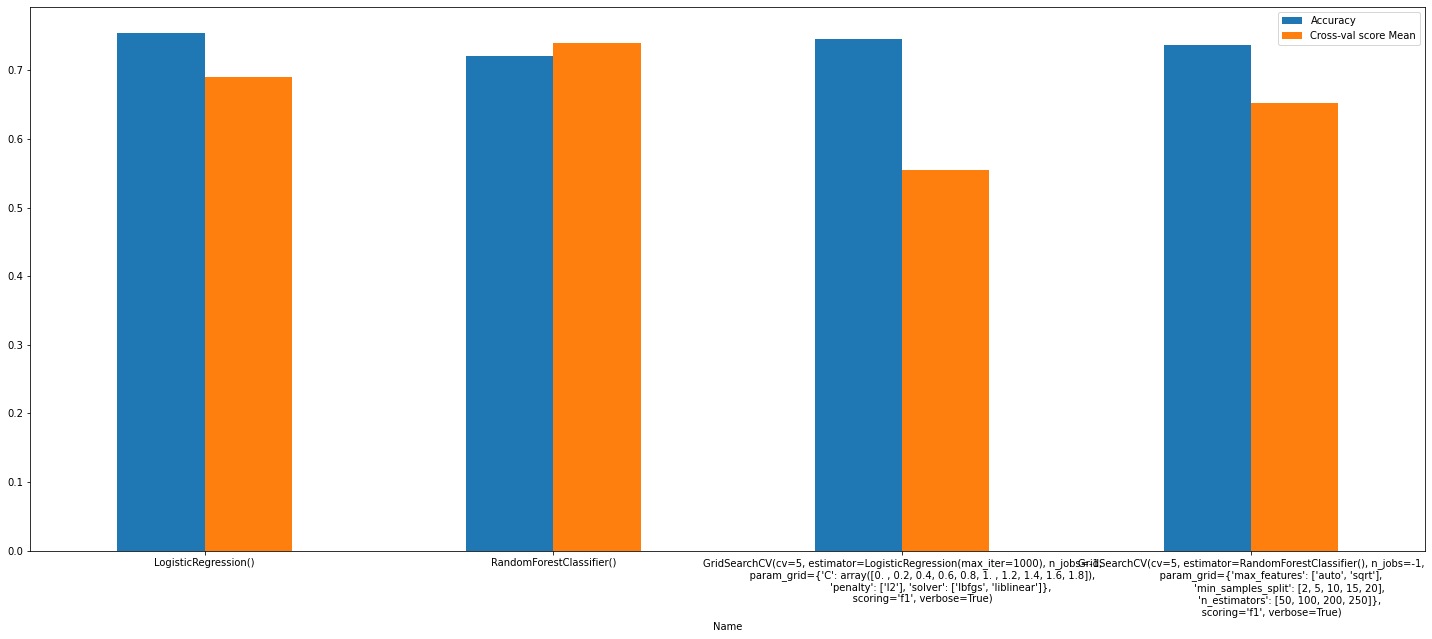

In [265]:
hyper_metrics[['Name','Accuracy','Cross-val score Mean']].plot.bar(x='Name',figsize=(25,10))
plt.xticks(rotation=0)
plt.show()

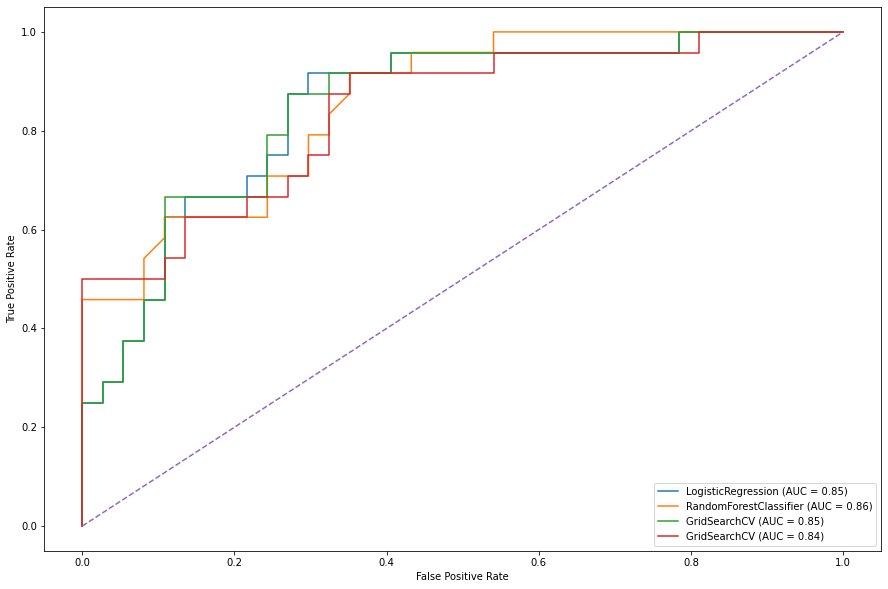

In [263]:
fig ,ax = plt.subplots(figsize=(15,10))
for clf in hyper_metrics['Model']:
    plot_roc_curve(clf,X_test,y_test,ax=ax)
ax.plot([0,1],[0,1], linestyle='--')


## We choose base RandomForestClassifier as it has highest AUC 0.86

In [268]:
import joblib
joblib.dump(rf_clf, 'random_forest_heart_disease.joblib')

['random_forest_heart_disease.joblib']

In [269]:
rf_clf.predict([X_test.values[0]])

array([1], dtype=int64)